##Section 1: Overall read mapping dynamics under shifting environmental factors
Trends of reads mapping for diatoms and haptophytes. Then, dive in and look at specific mapping dynamics to E. hux strains

In [1]:
#Read in important paths 
import pandas as pd
import cPickle as cpk
import matplotlib as mpl
import sys
import numpy as np
sys.path.append("/Users/harrietalexander/anaconda/lib/python2.7/site-packages/matplotlib_venn-0.11-py2.7.egg")
sys.path.insert(1, '/Users/harrietalexander/anaconda/lib/python2.7/site-packages')
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib import gridspec
from itertools import combinations
import palettable.colorbrewer as b2m
import palettable as pal
import glob
from Bio import SeqIO
from string import ascii_lowercase, ascii_uppercase
from matplotlib.colors import LogNorm, NoNorm

mpl.rcParams['pdf.fonttype']=42
%matplotlib inline
def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = str(100 * y)

    # The percent symbol needs escaping in latex
    if mpl.rcParams['text.usetex'] == True:
        return s + r'$\%$'
    else:
        return s + '%'
mpl.rcParams['font.sans-serif']='Arial'

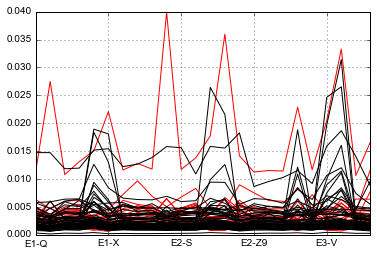

In [2]:
#read in all the MMETSP species summped reads
MMETSP_AllSpecies=pd.read_table('MMETSP_Mapping/MMETSP_All_Mapping.tab', index_col='gID')
#calc tpm
MMETSP_AllSpecies=(MMETSP_AllSpecies/MMETSP_AllSpecies.sum())
#Read in the lists of Dias and Haps
Dia_pd=pd.read_table('MMETSP_Mapping/OnlyDeep_Species_Diatoms.tab', index_col=0)
Hap_pd=pd.read_table('MMETSP_Mapping/OnlyDeep_Species_Hap.tab', index_col=0)
DiaList=Dia_pd.index
HapList=Hap_pd.index
#Get counts across all treatments
Dia_pd=MMETSP_AllSpecies.loc[DiaList]
Hap_pd=MMETSP_AllSpecies.loc[HapList]
#plot just overall TPM for diatoms and haptophytes : you can really see the peak in blooming of diaotms compared to haptophytes? More broad/more than one taxa? 
fig,ax=plt.subplots(1)
Hap_pd.T.plot(legend=False, color='r', ax=ax)
Dia_pd.T.plot(legend=False, color='k', ax=ax)

In [3]:
#Get the ranks for all the species
Dia_rank=Dia_pd.rank(axis=0,ascending=False)
Hap_rank=Hap_pd.rank(axis=0,ascending=False)
#get list of insitus etc. 
AllTreatments=Dia_rank.columns

insitu=[col for col in AllTreatments if 'Z' in col]
R=[col for col in AllTreatments if 'V' in col]


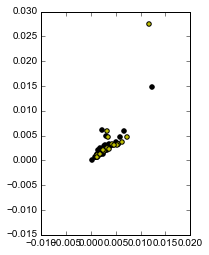

In [6]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
ax.scatter(Dia_pd['E1-Z1'], Dia_pd['E1-R'], c='k')
ax.scatter(Hap_pd['E1-Z1'], Hap_pd['E1-R'], c='y')




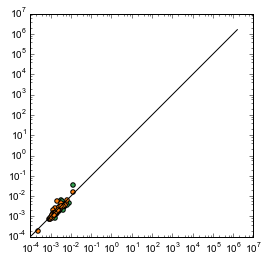

In [7]:
insitu=[col for col in AllTreatments if 'Z' in col]

R=[col for col in AllTreatments if 'R' in col]
R=[col for col in R if 'E3' not in col]

X=[col for col in AllTreatments if 'X' in col]

Q=[col for col in AllTreatments if 'Q' in col]

S=[col for col in AllTreatments if 'S' in col]
S=[col for col in S if 'E3' not in col]

T=[col for col in AllTreatments if 'T' in col]
T=[col for col in T if 'E3' not in col]

V=[col for col in AllTreatments if 'V' in col]
V=[col for col in T if 'E3' not in col]

treatments=[Q, R, S, T, V, X]

def ScatterTreatment(df, x, treatments, ax=None, colors=None):
    if colors==None:
        colors=pal.tableau.GreenOrange_6.hex_colors
    im=df[x].mean(axis=1)
    if ax == None:
        fig,ax=plt.subplots(1)

    for c,t in zip(colors,treatments):
        tm=df[t].mean(axis=1)
        ax.scatter(im,tm,c=c)        
        ax.set_aspect('equal')
#         ax.set_xlim([0,1600000])
#         ax.set_ylim([0,1600000])

fig,ax=plt.subplots(1)
ax.plot((0,1600000), (0, 1600000), 'k')
ax.set_yscale('log')
ax.set_xscale('log')

ScatterTreatment(Hap_pd, insitu, [R],ax=ax, colors=['#32A251', '#FF7F0F'])
ScatterTreatment(Dia_pd,insitu,[R],ax=ax, colors=['#FF7F0F'])

ValueError: x and y must have same first dimension

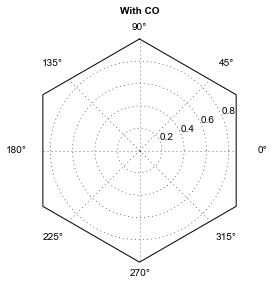

In [22]:
"""
Functions to create a radar chart

.. [1] http://en.wikipedia.org/wiki/Radar_chart
"""
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = 2*np.pi * np.linspace(0, 1-1./num_vars, num_vars)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(theta * 180/np.pi, labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts


def example_data():
    #The following data is from the Denver Aerosol Sources and Health study.
    #See  doi:10.1016/j.atmosenv.2008.12.017
    #
    #The data are pollution source profile estimates for five modeled pollution
    #sources (e.g., cars, wood-burning, etc) that emit 7-9 chemical species.
    #The radar charts are experimented with here to see if we can nicely
    #visualize how the modeled source profiles change across four scenarios:
    #  1) No gas-phase species present, just seven particulate counts on
    #     Sulfate
    #     Nitrate
    #     Elemental Carbon (EC)
    #     Organic Carbon fraction 1 (OC)
    #     Organic Carbon fraction 2 (OC2)
    #     Organic Carbon fraction 3 (OC3)
    #     Pyrolized Organic Carbon (OP)
    #  2)Inclusion of gas-phase specie carbon monoxide (CO)
    #  3)Inclusion of gas-phase specie ozone (O3).
    #  4)Inclusion of both gas-phase speciesis present...
    data = {
        'column names':
            ['Sulfate', 'Nitrate', 'EC', 'OC1', 'OC2', 'OC3', 'OP', 'CO',
             'O3'],
        'Basecase':
            [[0.88, 0.01, 0.03, 0.03, 0.00, 0.06, 0.01, 0.00, 0.00],
             [0.07, 0.95, 0.04, 0.05, 0.00, 0.02, 0.01, 0.00, 0.00],
             [0.01, 0.02, 0.85, 0.19, 0.05, 0.10, 0.00, 0.00, 0.00],
             [0.02, 0.01, 0.07, 0.01, 0.21, 0.12, 0.98, 0.00, 0.00],
             [0.01, 0.01, 0.02, 0.71, 0.74, 0.70, 0.00, 0.00, 0.00]],
        'With CO':
            [[0.88, 0.02, 0.02, 0.02, 0.00, 0.05, 0.00, 0.05, 0.00],
             [0.08, 0.94, 0.04, 0.02, 0.00, 0.01, 0.12, 0.04, 0.00],
             [0.01, 0.01, 0.79, 0.10, 0.00, 0.05, 0.00, 0.31, 0.00],
             [0.00, 0.02, 0.03, 0.38, 0.31, 0.31, 0.00, 0.59, 0.00],
             [0.02, 0.02, 0.11, 0.47, 0.69, 0.58, 0.88, 0.00, 0.00]],
        'With O3':
            [[0.89, 0.01, 0.07, 0.00, 0.00, 0.05, 0.00, 0.00, 0.03],
             [0.07, 0.95, 0.05, 0.04, 0.00, 0.02, 0.12, 0.00, 0.00],
             [0.01, 0.02, 0.86, 0.27, 0.16, 0.19, 0.00, 0.00, 0.00],
             [0.01, 0.03, 0.00, 0.32, 0.29, 0.27, 0.00, 0.00, 0.95],
             [0.02, 0.00, 0.03, 0.37, 0.56, 0.47, 0.87, 0.00, 0.00]],
        'CO & O3':
            [[0.87, 0.01, 0.08, 0.00, 0.00, 0.04, 0.00, 0.00, 0.01],
             [0.09, 0.95, 0.02, 0.03, 0.00, 0.01, 0.13, 0.06, 0.00],
             [0.01, 0.02, 0.71, 0.24, 0.13, 0.16, 0.00, 0.50, 0.00],
             [0.01, 0.03, 0.00, 0.28, 0.24, 0.23, 0.00, 0.44, 0.88],
             [0.02, 0.00, 0.18, 0.45, 0.64, 0.55, 0.86, 0.00, 0.16]]}
    return data


if __name__ == '__main__':
    N = 6
    theta = radar_factory(N, frame='polygon')

    data = example_data()
    spoke_labels = data.pop('column names')

    fig = plt.figure(figsize=(9, 9))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    # Plot the four cases from the example data on separate axes
    for n, title in enumerate(data.keys()):
        ax = fig.add_subplot(2, 2, n+1, projection='radar')
        plt.rgrids([0.2, 0.4, 0.6, 0.8])
        ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(data[title], colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25)
        ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    plt.subplot(2, 2, 1)
    labels = ('Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5')
    legend = plt.legend(labels, loc=(0.9, .95), labelspacing=0.1)
    plt.setp(legend.get_texts(), fontsize='small')

    plt.figtext(0.5, 0.965, '5-Factor Solution Profiles Across Four Scenarios',
                ha='center', color='black', weight='bold', size='large')
    plt.show()

###Create radar plots for the two different groups using 

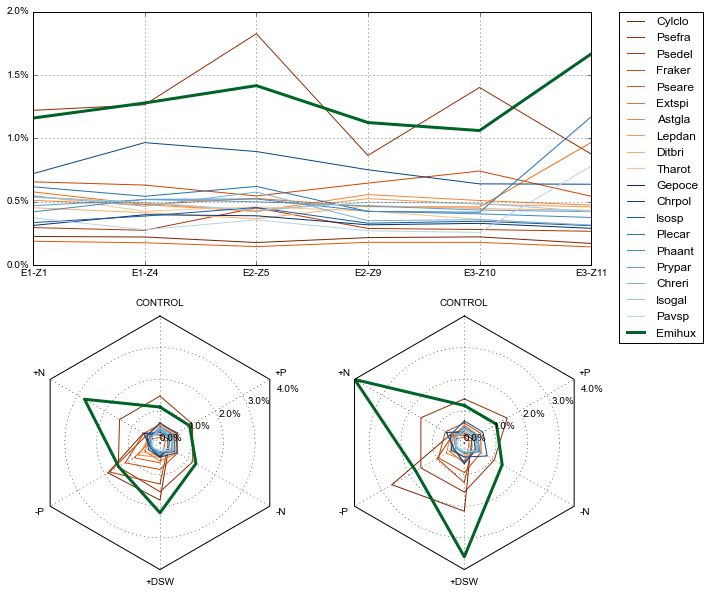

In [21]:

import matplotlib.ticker as mtick
DiaColor=pal.colorbrewer.sequential.Oranges_9_r.mpl_colormap(np.linspace(0,.7,10))
HapColor=pal.colorbrewer.sequential.Blues_9_r.mpl_colormap(np.linspace(0,.7,9))
EmiColor=pal.colorbrewer.sequential.Greens_9_r.mpl_colormap(0.1)
#Only plot the taxa that are >5 in any of the treatments
Dia_10=Dia_rank[Dia_rank[Dia_rank<=5].any(axis=1)].sort('E1-X').index
Hap_10=Hap_rank[Hap_rank[Hap_rank<=5].any(axis=1)].sort('E1-X').index
Hap_10=Hap_10[1:]
E1=[u'E1-Q', u'E1-R', u'E1-V', u'E1-X', u'E1-T', u'E1-S']
E2=[u'E2-Q', u'E2-R', u'E2-V', u'E2-X', u'E2-T', u'E2-S']


l=1
el=3

fig = plt.figure(figsize=(10, 10))

#Plot insitu data

ax3 = plt.subplot2grid((2,2), (0,0), colspan=2)


Dia_pd.loc[Dia_10,insitu].T.plot(ax=ax3, colors=DiaColor, lw=l)
Hap_pd.loc[Hap_10,insitu].T.plot(ax=ax3, colors=HapColor, lw=l)
Hap_pd.loc['Emihux',insitu].T.plot(ax=ax3, colors=EmiColor, lw=el)

ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#create radar figure for E1
ax = fig.add_subplot(2,2, 3, projection='radar')
N = 6
theta = radar_factory(N, frame='polygon')
data=Dia_pd.loc[Dia_10,E1]
spoke_labels = data.columns
for d,c in zip(data.index, DiaColor):
    ax.plot(theta, data.loc[d], color=c,lw=l)

data=Hap_pd.loc[Hap_10,E1]
for d,c in zip(data.index,HapColor):
    ax.plot(theta, data.loc[d], color=c,lw=l)
ax.plot(theta, Hap_pd.loc['Emihux',E1], color=EmiColor, lw=el)
ax.set_varlabels(spoke_labels)


#create radar figure for E2

ax2 = fig.add_subplot(2,2, 4, projection='radar')

N = 6
theta = radar_factory(N, frame='polygon')
data=Dia_pd.loc[Dia_10,E2]
spoke_labels = data.columns
for d,c in zip(data.index,DiaColor):
    ax2.plot(theta, data.loc[d], color=c, lw=l)
data=Hap_pd.loc[Hap_10,E2]
spoke_labels = data.columns
for d,c in zip(data.index,HapColor):
    ax2.plot(theta, data.loc[d], color=c, lw=l)
ax2.plot(theta, Hap_pd.loc['Emihux',E2], color=EmiColor, lw=3)
# ax2.fill(theta, Hap_pd.loc['Emihux',E2], color=EmiColor, alpha=.2)
    
    
spoke_labels=[u'CONTROL', u'+N', u'-P', u'+DSW', u'-N', u'+P']
ax.set_varlabels(spoke_labels)
ax2.set_varlabels(spoke_labels)


ax.set_ylim([0,.04])      
ax2.set_ylim([0,.04])      

ax.set_yticks(np.arange(0,.045,.01))
ax2.set_yticks(np.arange(0,.045,.01))
ax.set_yticks(np.arange(0,.045,.01))
ax2.set_yticks(np.arange(0,.045,.01))


# Create the formatter using the function to_percent. This multiplies all the
# default labels by 100, making them all percentages
formatter = mtick.FuncFormatter(to_percent)

# Set the formatter
ax.yaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)

fig.savefig('GroupProfile.pdf')

##Assessing the strain distribution of E. huxleyi compiled transcriptomes/genome transcripts in the field

In [23]:
#Load in the hash data
gFHash=cpk.load(open('orthoMCL_output/Ehux_Dictionary.pickle', 'r'))


In [24]:
#Parse the gFHash to tally the number of genes in an orthologus group and the number of genes from each of the individual taxa
#Panda dataframe of form : Orthologus group | total number of genes in orthologus group | total number from each strain
#Nested for loop... so it takes a while. 
Hist_PD=pd.DataFrame(index=gFHash.keys(),columns=['NumGenes', 'Emi374', 'Emi379', 'Emi370', 'Emi219', 'Emihu1'])
Hist_PD=Hist_PD.fillna(0)
for i,key in enumerate(gFHash):
#     if i==100:
#         break
    l=len(gFHash[key])
    Hist_PD.loc[key, 'NumGenes']=l
    for transcript in gFHash[key]:
        org=transcript.split('|')[0]
        Hist_PD.loc[key,org]+=1


In [26]:
GenesInOrg={}
GenesInOrg['Emi219']=Hist_PD[Hist_PD.Emi219>0].index
GenesInOrg['Emi379']=Hist_PD[Hist_PD.Emi379>0].index
GenesInOrg['Emi370']=Hist_PD[Hist_PD.Emi370>0].index
GenesInOrg['Emi374']=Hist_PD[Hist_PD.Emi374>0].index
GenesInOrg['Emihu1']=Hist_PD[Hist_PD.Emihu1>0].index

def Calculate_Venn_comparison(hash):
    #input = a Hash of the form hash[Organism]=list of orthologus groups
    #Outputs a hash of the form key = all the variations of thes sets : list of orthologus genes in an inclusive way
    #It is inclusive so the set containing A uniq genes is going to contain all the genes for an org
    variations={}
    for i in range(len(hash)):
        for v in combinations(hash.keys(), i+1):
            vsets = [hash[x] for x in v]
            variations[tuple(sorted(v))]=reduce(lambda x,y: x.intersection(y), vsets)
    return variations

def GetDifference_Venn(variations):
    #Function takes the input from the above function and outputs a hash of the same format but 
    #each set is uniqe: e.g. there are no repeats of orthologus groups across sets. 
    outdict={}
    vkeys=variations.keys()
    #loop over each of the variable cases
    for v in variations:
        #create a set to do the comparisons
        vset=set(v)
        vdata_set=set(variations[v])
        #loop over all other variations
        for j in variations:
            #if v is a subset of jset we want to remove the items of jset from v set
            jdata_set=set(variations[j])
            jset=set(j)
            if vset.issubset(jset):
                if vset==jset:
                    pass
                else: 
                    newdata=vdata_set-jdata_set
                    vdata_set=newdata
        outdict[v]=vdata_set
    return outdict

#Get the genes that are unique with in the venn: format of the hash = name of the subset : Orthologus gene groups
Genes_In_Each_Cat=Calculate_Venn_comparison(GenesInOrg)
Genes_Uniq_Venn=GetDifference_Venn(Genes_In_Each_Cat)

# for key in Genes_Uniq_Venn:
#     fName='_'.join(list(key))
#     fName='Species_GeneLists_Venn/'+fName+'.list'
#     file=open(fName, 'w')

#     for item in Genes_Uniq_Venn[key]:
#         file.write(item.strip())
#         file.write('\n')
#     file.close()

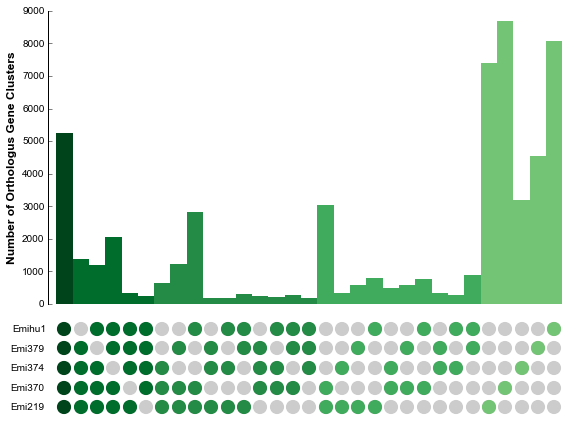

In [27]:

def plot_Scatter_histogram(Hash_in,s=200):
    #takes a hash of the form (set, numbers)
    #get the number of sets and the number of groups: get the lengths there in
    num_sets=len(Hash_in)
    grpNames=np.sort(list(set(np.hstack(Hash_in.keys()))))
    num_groups=len(grpNames)
    y=np.sort(num_sets*range(1,num_groups+1))
    x=num_groups*range(1,num_sets+1)

    color=b2m.sequential.Greys_5.hex_colors
    color_bar=b2m.sequential.Greens_9.hex_colors
#   fig=plt.figure(figsize=(num_sets/3, num_groups))
    fig = plt.figure(figsize=(8, 6)) 

    gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    #create grid of dots
    ax2.scatter(x,y, c=color[1], linewidth=0, s=s)
    #alter the range etc. of pltos
    ax1.set_xlim([0, np.max(x)+.7])
    ax2.set_xlim([0, np.max(x)+.7])
    ax2.set_ylim([.5, np.max(y)+.5])
    ax2.set_yticks(range(1,num_groups+1))
    ax2.set_yticklabels(grpNames)
    ax2.spines['left'].set_color('none')
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['bottom'].set_color('none')
    ax2.tick_params(axis='both',         
        which='both',      
        bottom='off',      
        top='off',  
        right='off',
        left='off',
        labelbottom='off') 
    ax1.tick_params(axis='both',         
        which='both',      
        bottom='off',      
        top='off',  
        right='off',
        labelbottom='off') 
#     ax1.spines['left'].set_color('none')
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_color('none')
    grpHash={}
    for i,x in enumerate(grpNames):
        grpHash[x]=i+1
    #sort he list of keys (sets) by the length of the set
    xs=Hash_in.keys()
    xs.sort()
    xs.sort(key = lambda s: len(s), reverse=True)
    plt.tight_layout()
    ax1.set_ylabel('Number of Orthologus Gene Clusters', fontsize='large', weight='bold')
    
    for i,key in enumerate(xs):
        nGenes=len(Hash_in[key])
        i+=1#number along the x axis
        for j in key:
            n=grpHash[j]#number along the y axis
            ax2.scatter(i,n, s=s, c=color_bar[len(key)+3], lw=0)
            rect=plt.Rectangle((i-.5,0), 1, nGenes, fc=color_bar[len(key)+3],lw=0)
            ax1.add_patch(rect)
            ax1.plot()
    return fig, xs
    
fig1,EHX_SortedList=plot_Scatter_histogram(Genes_Uniq_Venn,s=200)


In [28]:
CoreGenes=Genes_Uniq_Venn[('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1')] #get the genes that are core to all organisms
#create a PD Dataframe that is the number of genes from each org in the core gene set
TranscriptTally=pd.DataFrame(columns=('Emihu1','Emi219', 'Emi370', 'Emi374', 'Emi379'), index=CoreGenes) 
TranscriptTally=TranscriptTally.fillna(0)
for Gene in CoreGenes:
    for transcript in gFHash[Gene]:
        species=transcript.split('|')[0]
        TranscriptTally.loc[Gene,species]+=1


In [29]:
#Import data

test=pd.read_table("output_RSEM_Bowtie2/E2-R_ACTTGA.genes.results", index_col='gene_id')

outHash={}
for group in Genes_Uniq_Venn:
    p=test.loc[Genes_Uniq_Venn[group]].TPM.sum()
    outHash[group]=[len(Genes_Uniq_Venn[group]), p]

In [34]:
def plot_Scatter_histogram_fieldTPM(Hash_in,s=200, title=None, filetype='.pdf', plotType=None):
    #takes a hash of the form (set, numbers)
    #get the number of sets and the number of groups: get the lengths there in
    num_sets=len(Hash_in)
    grpNames=np.sort(list(set(np.hstack(Hash_in.keys()))))
    num_groups=len(grpNames)
    y=np.sort(num_sets*range(1,num_groups+1))
    x=num_groups*range(1,num_sets+1)

    color=b2m.sequential.Greys_5.hex_colors
    color_bar=b2m.sequential.Greens_9.hex_colors
#   fig=plt.figure(figsize=(num_sets/3, num_groups))
    fig = plt.figure(figsize=(8, 6)) 
    fig.suptitle(title)

    gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    #create grid of dots
    ax2.scatter(x,y, c=color[1], linewidth=0, s=s)
    #alter the range etc. of pltos
    ax1.set_xlim([0, np.max(x)+.7])
    ax2.set_xlim([0, np.max(x)+.7])
    ax2.set_ylim([.5, np.max(y)+.5])
    ax2.set_yticks(range(1,num_groups+1))
    ax2.set_yticklabels(grpNames)
    ax2.spines['left'].set_color('none')
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['bottom'].set_color('none')
    ax2.tick_params(axis='both',         
        which='both',      
        bottom='off',      
        top='off',  
        right='off',
        left='off',
        labelbottom='off') 
    ax1.tick_params(axis='both',         
        which='both',      
        bottom='off',      
        top='off',  
        right='off',
        labelbottom='off') 
#     ax1.spines['left'].set_color('none')
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_color('none')
    grpHash={}
    for i,x in enumerate(grpNames):
        grpHash[x]=i+1
    #sort he list of keys (sets) by the length of the set
    xs=Hash_in.keys()
    xs.sort()
    xs.sort(key = lambda s: len(s), reverse=True)
    plt.tight_layout()
    for i,key in enumerate(xs):
        nGenes=len(Hash_in[key])
        i+=1#number along the x axis
        for j in key:
            n=grpHash[j]#number along the y axis
            ax2.scatter(i,n, s=s, c=color_bar[len(key)+3], lw=0)
            if plotType=='tpm':
                rect=plt.Rectangle((i-.5,0), 1, Hash_in[key]['TPM'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('Total TPM', fontsize='large', weight='bold')

            elif plotType=='% of genes':
                rect=plt.Rectangle((i-.5,0), 1, float(Hash_in[key]['Greater0'])/Hash_in[key]['Len_total'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('% of genes expressed', fontsize='large', weight='bold')
            elif plotType=='TPM norm to % of genes in field':
                rect=plt.Rectangle((i-.5,0), 1, float(Hash_in[key]['TPM'])/Hash_in[key]['Greater0'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('TPM normalized to expressed genes #', fontsize='large', weight='bold')
             
            else:    
                rect=plt.Rectangle((i-.5,0), 1, Hash_in[key]['TPM']/Hash_in[key]['Len_total'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('Average TPM within Group', fontsize='large', weight='bold')

            ax1.add_patch(rect)
            ax1.plot()
    fig.savefig(title+filetype)
    return fig

def ParseField_RSEM_Files(files):
    InsituHash={}
    for f in glob.glob(files):
        name=f.split('/')[1]
        name=name.split('_')[0]
        print name
        InsituHash[name]=pd.read_table(f,index_col='gene_id')

    outHash={}
    for sample in InsituHash:
        a={}
        for group in Genes_Uniq_Venn:
            match=InsituHash[sample].loc[Genes_Uniq_Venn[group]].TPM
            summedTPM=InsituHash[sample].loc[Genes_Uniq_Venn[group]].TPM.sum()
            len_match=len(match)
            len_match_greater0=len(match[match>0])
            a[group]={}
            a[group]['TPM']=summedTPM
            a[group]['Len_total']=len_match
            a[group]['Greater0']=len_match_greater0
        outHash[sample]=a
    return outHash
        


E1-Z1
E1-Z4
E2-Z5
E2-Z9
E3-Z10
E3-Z11


[('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1'), ('Emi219', 'Emi370', 'Emi374', 'Emi379'), ('Emi219', 'Emi370', 'Emi374', 'Emihu1'), ('Emi219', 'Emi370', 'Emi379', 'Emihu1'), ('Emi219', 'Emi374', 'Emi379', 'Emihu1'), ('Emi370', 'Emi374', 'Emi379', 'Emihu1'), ('Emi219', 'Emi370', 'Emi374'), ('Emi219', 'Emi370', 'Emi379'), ('Emi219', 'Emi370', 'Emihu1'), ('Emi219', 'Emi374', 'Emi379'), ('Emi219', 'Emi374', 'Emihu1'), ('Emi219', 'Emi379', 'Emihu1'), ('Emi370', 'Emi374', 'Emi379'), ('Emi370', 'Emi374', 'Emihu1'), ('Emi370', 'Emi379', 'Emihu1'), ('Emi374', 'Emi379', 'Emihu1'), ('Emi219', 'Emi370'), ('Emi219', 'Emi374'), ('Emi219', 'Emi379'), ('Emi219', 'Emihu1'), ('Emi370', 'Emi374'), ('Emi370', 'Emi379'), ('Emi370', 'Emihu1'), ('Emi374', 'Emi379'), ('Emi374', 'Emihu1'), ('Emi379', 'Emihu1'), ('Emi219',), ('Emi370',), ('Emi374',), ('Emi379',), ('Emihu1',)]


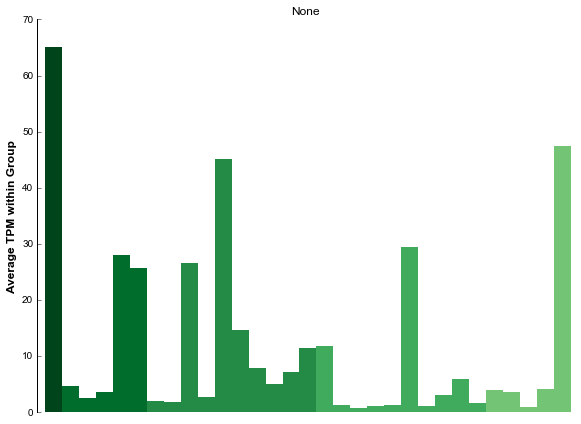

In [39]:
def plot_Scatter_histogram_fieldTPM_grid(Hash_in,s=200, title=None, filetype='.pdf', plotType=None, ax1=None):
    #takes a hash of the form (set, numbers)
    #get the number of sets and the number of groups: get the lengths there in
    num_sets=len(Hash_in)
    grpNames=np.sort(list(set(np.hstack(Hash_in.keys()))))
    num_groups=len(grpNames)
    y=np.sort(num_sets*range(1,num_groups+1))
    x=num_groups*range(1,num_sets+1)

    color=b2m.sequential.Greys_5.hex_colors
    color_bar=b2m.sequential.Greens_9.hex_colors
#   fig=plt.figure(figsize=(num_sets/3, num_groups))
    if ax1==None:
        
        fig = plt.figure(figsize=(8, 6)) 
#     fig.suptitle(title)
        ax1=fig.add_subplot(111)
#     gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
#     ax1 = plt.subplot(gs[0])
#     ax2 = plt.subplot(gs[1])
    #create grid of dots
#     ax2.scatter(x,y, c=color[1], linewidth=0, s=s)
    #alter the range etc. of pltos
    ax1.set_xlim([0, np.max(x)+.7])
#     ax2.set_xlim([0, np.max(x)+.7])
#     ax2.set_ylim([.5, np.max(y)+.5])
#     ax2.set_yticks(range(1,num_groups+1))
#     ax2.set_yticklabels(grpNames)
#     ax2.spines['left'].set_color('none')
#     ax2.spines['right'].set_color('none')
#     ax2.spines['top'].set_color('none')
#     ax2.spines['bottom'].set_color('none')
#     ax2.tick_params(axis='both',         
#         which='both',      
#         bottom='off',      
#         top='off',  
#         right='off',
#         left='off',
#         labelbottom='off') 
    ax1.set_title(title)
    ax1.tick_params(axis='both',         
        which='both',      
        bottom='off',      
        top='off',  
        right='off',
        labelbottom='off') 
#     ax1.spines['left'].set_color('none')
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_color('none')
    grpHash={}
    for i,x in enumerate(grpNames):
        grpHash[x]=i+1
    #sort he list of keys (sets) by the length of the set
    xs=Hash_in.keys()
    xs.sort()
    xs.sort(key = lambda s: len(s), reverse=True)
    print xs
    plt.tight_layout()
    for i,key in enumerate(xs):
        nGenes=len(Hash_in[key])
        i+=1#number along the x axis
        for j in key:
            n=grpHash[j]#number along the y axis
#             ax2.scatter(i,n, s=s, c=color_bar[len(key)+3], lw=0)
            if plotType=='tpm':
                rect=plt.Rectangle((i-.5,0), 1, Hash_in[key]['TPM'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('Total TPM', fontsize='large', weight='bold')

            elif plotType=='% of genes':
                rect=plt.Rectangle((i-.5,0), 1, float(Hash_in[key]['Greater0'])/Hash_in[key]['Len_total'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('% of genes expressed', fontsize='large', weight='bold')
            elif plotType=='TPM norm to % of genes in field':
                rect=plt.Rectangle((i-.5,0), 1, float(Hash_in[key]['TPM'])/Hash_in[key]['Greater0'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('TPM normalized to expressed genes #', fontsize='large', weight='bold')
             
            else:    
                rect=plt.Rectangle((i-.5,0), 1, Hash_in[key]['TPM']/Hash_in[key]['Len_total'], fc=color_bar[len(key)+3],lw=0)
                ax1.set_ylabel('Average TPM within Group', fontsize='large', weight='bold')

            ax1.add_patch(rect)
            ax1.plot()
    return ax1

plot_Scatter_histogram_fieldTPM_grid(InsituHash['E1-Z1'],s=200, title=None, filetype='.pdf', plotType=None, ax1=None)


In [ ]:
InsituHash=ParseField_RSEM_Files('output_RSEM_Bowtie2/*Z*genes.results')
